# Project 1 - Prediction of Instagram Followers

Creation of a conda environment an adding it to Jupyter Notebook.
<div class="alert alert-block alert-success" style="font-family: monospace">
conda create --name ml<br>
conda activate ml<br>
conda install -c anaconda ipykernel<br>
python -m ipykernel install --user --name=ml<br>
</div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# import tensorflow as tf

# Data
Source: https://www.kaggle.com/datasets/iabdulw/dynamics-of-instagram-users

### About Dataset
These two data sets are gathered from Instagram users who were chosen randomly.

The Main data set encompasses data for 1K users including 500 men and 500 women. The Test data set encompasses data for 100 users including 50 men and 50 women.

Data gathered for each user includes :

- 1- number of posts

- 2- number of followers

- 3- number of followings

- 4- number of likes for the tenth previous post

- 5- number of likes for the eleventh previous post

- 6- number of likes for the twelfth previous post

- 7- number of self-presenting posts from nine previous posts

- 8- gender

source: https://zenodo.org/record/823283

### Exploring the data

In [2]:
train = pd.read_excel('./data/MainDataset- Instagram.xlsx')
test = pd.read_excel('./data/TestDataset-Instagram.xlsx')

In [3]:
train.head(3)

,Users,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
0,User-1,486,279,19,15,10,17,0,m
1,User-2,401,5509,342,360,440,428,0,f
2,User-3,463,453,293,65,68,149,4,f


In [4]:
# train.rename({' Gender':'Gender'}, axis=1, inplace=True)
# test.rename({' Gender':'Gender'}, axis=1, inplace=True)

In [5]:
# train.columns

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Users                                                     1000 non-null   object
 1   Number of Posts                                           1000 non-null   int64 
 2   Number of Followers                                       1000 non-null   int64 
 3   Number of Followings                                      1000 non-null   int64 
 4   Number of Likes for the Tenth Previous Post               1000 non-null   int64 
 5   Number of Likes for the Eleventh Previous Post            1000 non-null   int64 
 6   Number of Likes for the Twelfth Previous Post             1000 non-null   int64 
 7   Number of Self-Presenting Posts from Nine Previous Posts  1000 non-null   int64 
 8    Gender                       

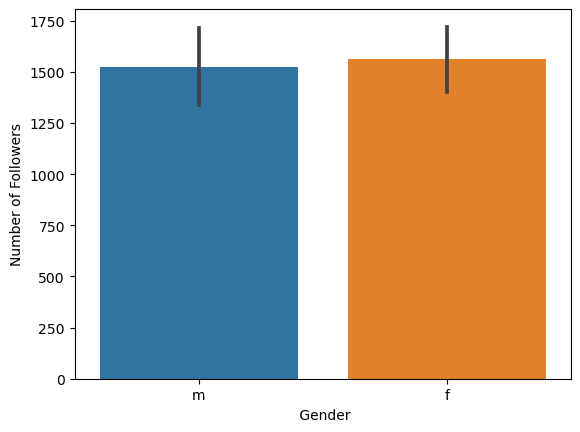

In [32]:
sns.barplot(x=' Gender', y='Number of Followers', data=train);

<Axes: xlabel=' Gender', ylabel='Number of Posts'>

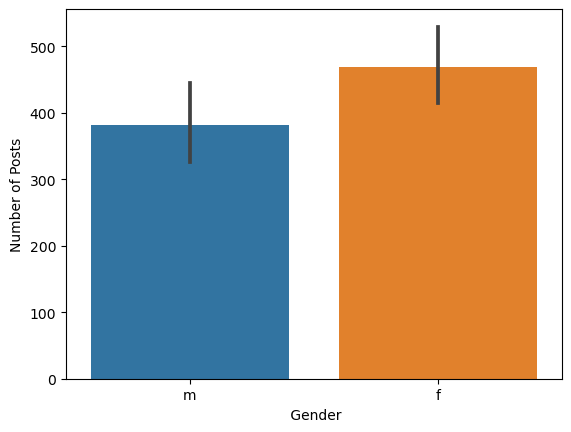

In [9]:
sns.barplot(x=' Gender', y='Number of Posts', data=train);

On the first look we can see that the number of followers is **very simmilar for each sex**, however **females tend to share more posts**.

In [27]:
train.columns

Index(['Users', 'Number of Posts', 'Number of Followers',
       'Number of Followings', 'Number of Likes for the Tenth Previous Post',
       'Number of Likes for the Eleventh Previous Post',
       'Number of Likes for the Twelfth Previous Post',
       'Number of Self-Presenting Posts from Nine Previous Posts', ' Gender'],
      dtype='object')

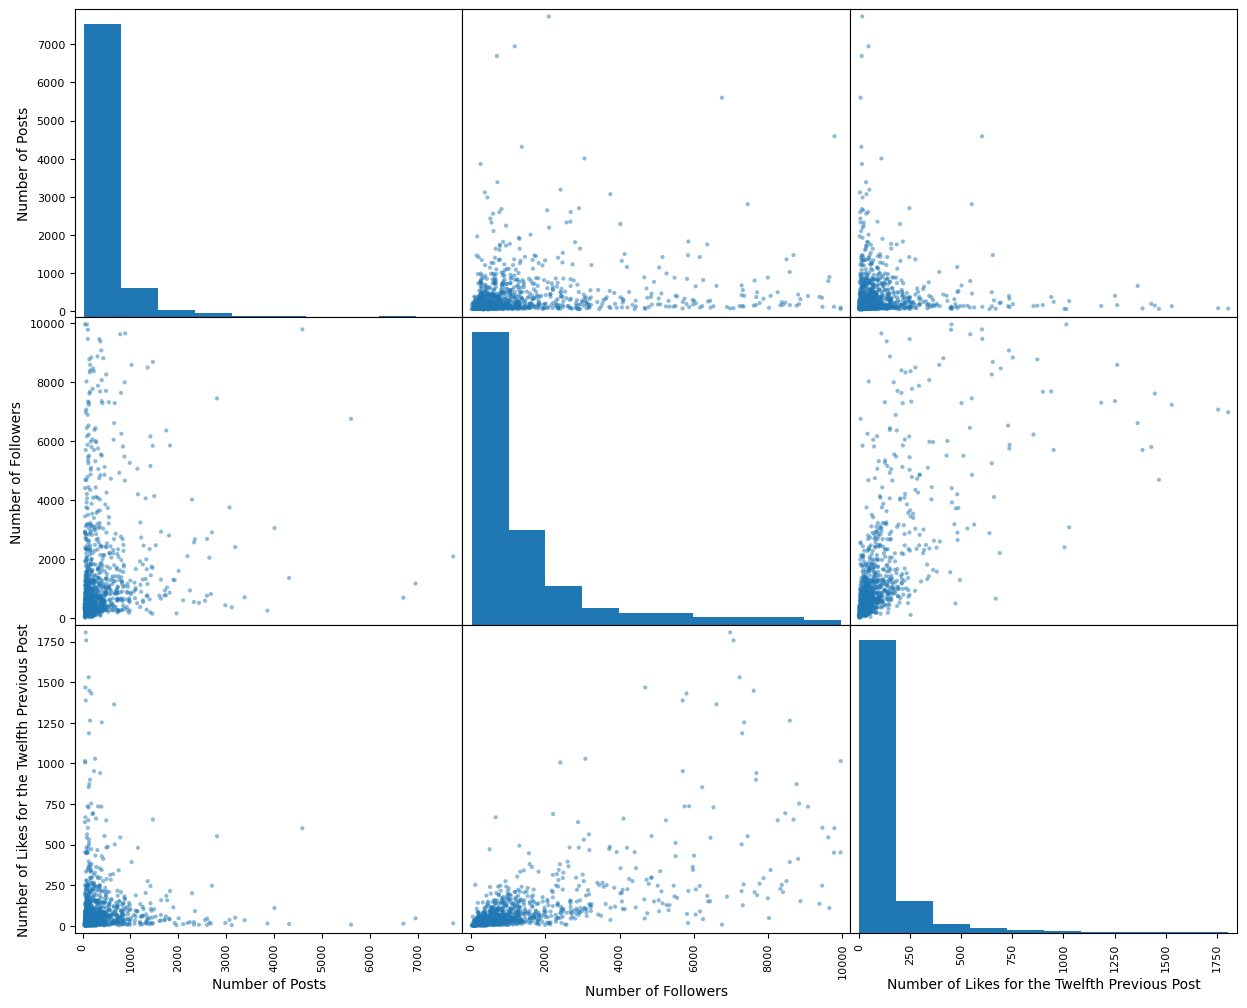

In [31]:
from pandas.plotting import scatter_matrix
attributes = [' Gender','Number of Posts', 'Number of Followers', 'Number of Likes for the Twelfth Previous Post']
scatter_matrix(train[attributes], figsize=(15, 12));

### Preparation for learning
The data is already cleaned, there are no missing values (thanks to Kaggle). What we need to do now is to drop columns that want be helfull during the traiuning and the column for labels. More over, we will encode the ``Gender`` column. To achive this I will use the `make_column_transformer` method.

In [11]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

other_cols = ['Number of Posts', 'Number of Followers',
              'Number of Followings',
              'Number of Likes for the Tenth Previous Post',
              'Number of Likes for the Eleventh Previous Post',
              'Number of Likes for the Twelfth Previous Post',
              'Number of Self-Presenting Posts from Nine Previous Posts']

In [17]:
from sklearn.compose import make_column_transformer

trans = make_column_transformer(
    ('drop', ['Number of Followers', 'Users']),
    (OrdinalEncoder(), ['Gender']),
    (StandardScaler(), other_cols))

from sklearn.preprocessing import FunctionTransformer
full_pipeline = Pipeline([
     ('rename', FunctionTransformer(lambda x: x.rename(columns={' Gender': 'Gender'}))),
    ('transform', trans),
])



x_train = full_pipeline.fit_transform(train)
x_test = full_pipeline.fit_transform(test)

y_train = train['Number of Followers']
y_test = test['Number of Followers']

In [23]:
print(f"The size of training set is {x_train.shape}, "
      f"the corresponding labes are a vector of length {y_train.size}")

The size of training set is (1000, 8), the corresponding labes are a vector of length 1000


#### First model - Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [70]:
lin_model.score(x_test, y_test)

0.8069540506515203

#### Polynomial Regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

# y_pred = poly_model.predict(x_poly_test)
y_pred = poly_model.predict(poly_features.transform(x_test))
poly_model.score(x_poly_test, y_test)

0.8069540506515194